<a href="https://colab.research.google.com/github/Radityaz/2025_AI_TI1B/blob/main/RikoAdityaZaki_AI_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JOBSHEET 10 MEMBANGUN MODEL (CLUSTERING)**

## **IMPORT LIBRARY**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


## **D.	LATIHAN**

### Percobaan 1 : Implementasi Clustering dengan K-Means

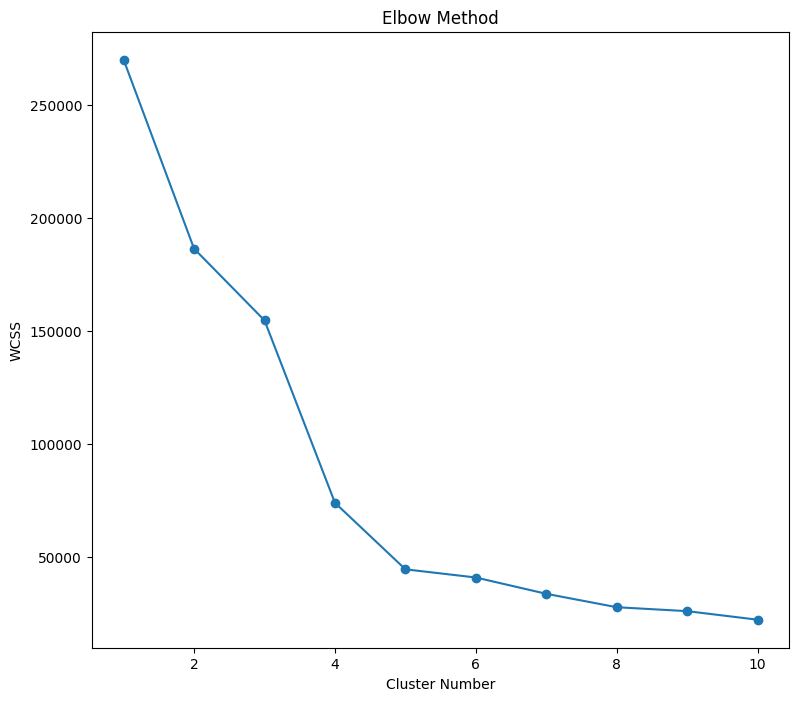

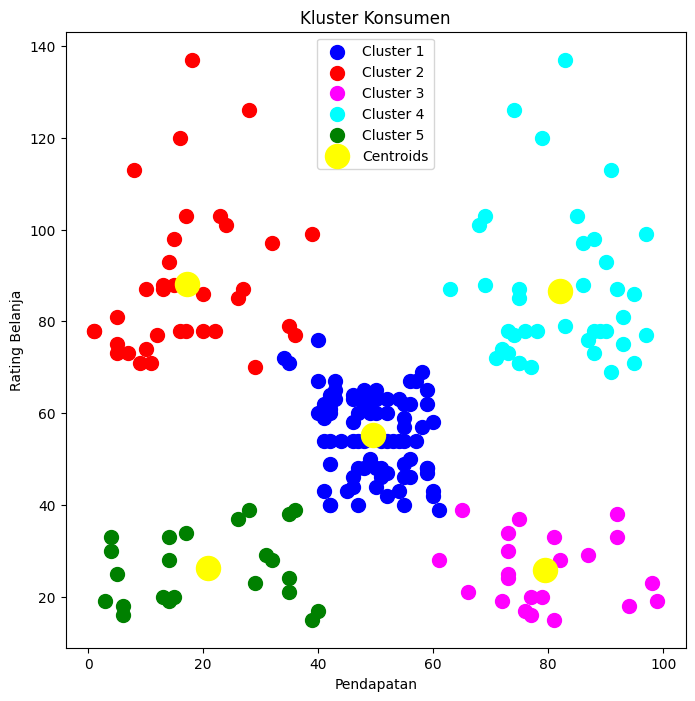

In [1]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Mengimpor dataset
dataset = pd.read_csv('Customer.csv')
dataset.head()

# Menyeleksi Kolom Rating_belanja dan Pendapatan
X = dataset.iloc[:, [3, 4]].values

# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(9, 8))
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualisasi hasil clusters
plt.figure(figsize=(8, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Kluster Konsumen')
plt.xlabel('Pendapatan')
plt.ylabel('Rating Belanja')
plt.legend()
plt.show()

### Percobaan 2 : Implementasi Clustering dengan Hierachical

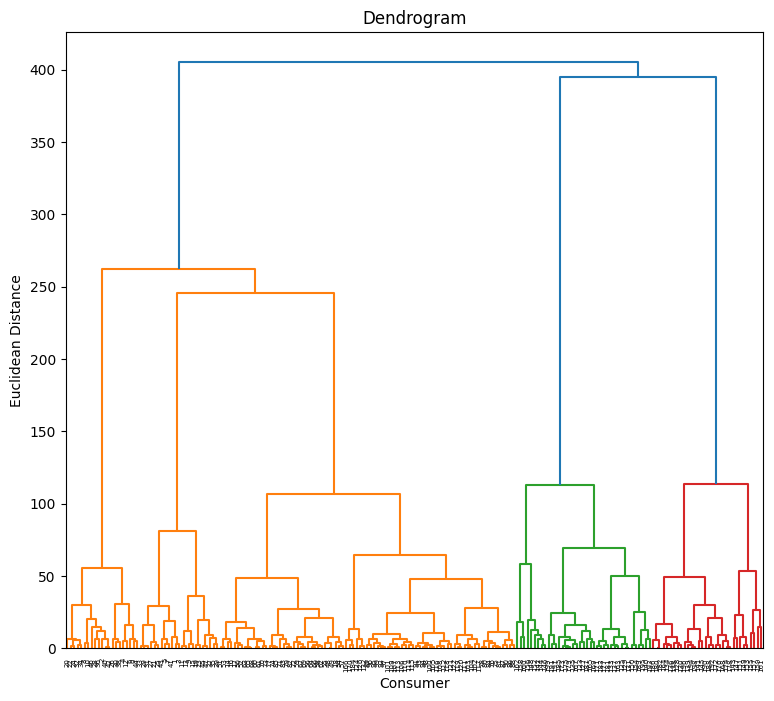

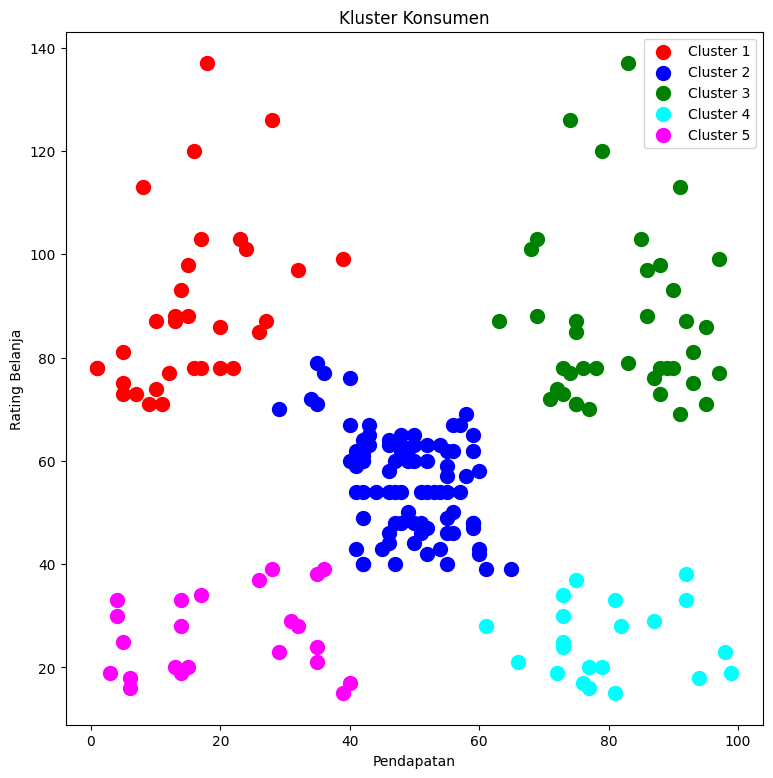

In [4]:
# Menggunakan dendrogram untuk menentukan angka cluster yang tepat
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(9, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Consumer')
plt.ylabel('Euclidean Distance')
plt.show()

# Menjalankan Hierarchical Clustering ke dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualisasi hasil clusters
plt.figure(figsize=(9, 9))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Kluster Konsumen')
plt.xlabel('Pendapatan')
plt.ylabel('Rating Belanja')
plt.legend()
plt.show()

### Percobaan 3 : Implementasi Clustering dengan DBSCAN

['y', 'b', 'g', 'r']


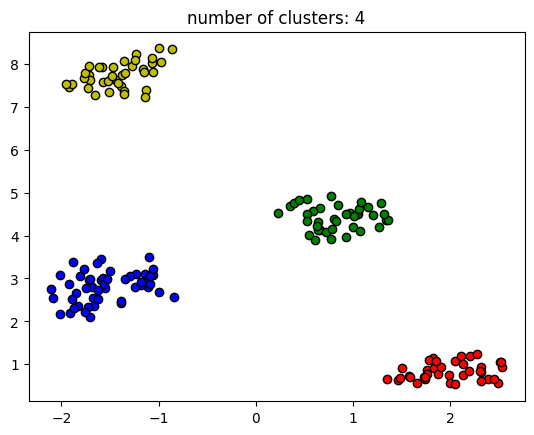

In [5]:
# Import Library yang dibutuhkan
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# Membuat dataset dengan make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.50, random_state=0)

# Menjalankan DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Visualisasi hasil clusters
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)
plt.title('number of clusters: %d' % n_clusters_)
plt.show()

## **E.	TUGAS PRAKTIKUM**

### Tugas 1: Implementasi K-Means untuk Mall Customers

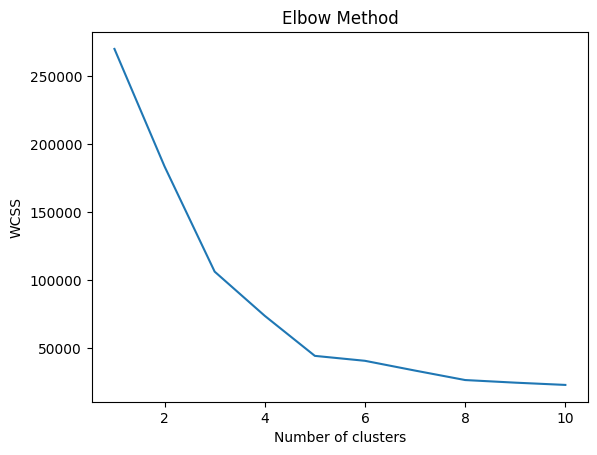

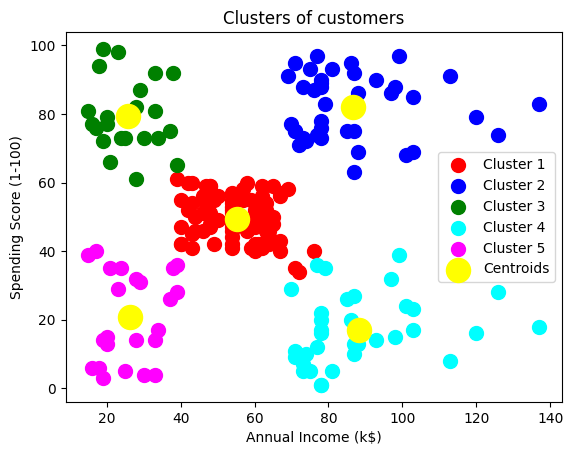

In [7]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Mengimpor dataset
dataset = pd.read_csv('Mall_Customers.csv')
dataset.columns = ['ID', 'Gender', 'Age', 'Income', 'SpendingScore']  # Rename kolom
X = dataset.iloc[:, [3, 4]].values  # Memilih kolom Income dan SpendingScore

# Metode Elbow
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K-Means dengan 5 cluster (berdasarkan Elbow Method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualisasi hasil
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Tugas 2: Implementasi DBSCAN untuk Mall Customers

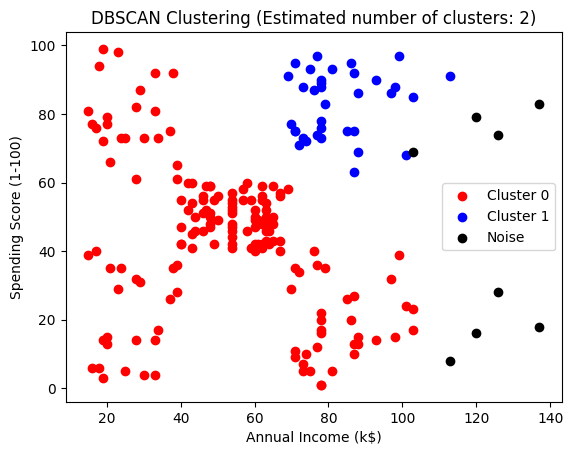

In [8]:
# Standarisasi data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
labels = db.labels_

# Jumlah cluster
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Visualisasi
unique_labels = set(labels)
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow']

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'  # Hitam untuk noise
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=col, label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title(f'DBSCAN Clustering (Estimated number of clusters: {n_clusters_})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()